In [ ]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import glob

import tensorflow as tf
from tensorflow import keras

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

In [ ]:
## Snipet to pull data from all csv files which is under Regions except the ones in smoothed folder
data = pd.DataFrame()

# Insert relevant path here
directoryPath = './COVID Symptoms Data/Region/'


# Lot of columns in the data are not consistentand these 28 columns where considered as relevant signals in the challange as well.
# You can remove the column selection parts to viz the entire data

for file_name in glob.glob(directoryPath+'*.csv'):
    x = pd.read_csv(file_name, low_memory=False)
    x = x[['Unnamed: 0', 'country_agg',
 'GID_0',
 'region_agg',
 'GID_1',
 'country_region_numeric',
 'gender',
 'age_bucket',
 'date',
 'total_responses',
 'weight_sums',
 'pct_cli',
 'pct_ili',
 'pct_fever',
 'pct_cough',
 'pct_difficulty_breathing',
 'pct_fatigue',
 'pct_stuffy_runny_nose',
 'pct_aches_muscle_pain',
 'pct_sore_throat',
 'pct_chest_pain',
 'pct_nausea',
 'pct_anosmia_ageusia',
 'pct_eye_pain',
 'pct_headache',
 'pct_chills',
 'pct_cmnty_sick',
 'pct_ever_tested',
 'pct_tested_recently',
 'pct_worked_outside_home',
 'pct_grocery_outside_home',
 'pct_ate_outside_home',
 'pct_spent_time_with_non_hh',
 'pct_attended_public_event',
 'pct_used_public_transit',
 'pct_direct_contact_with_non_hh',
 'pct__all_time',
 'pct_wear_mask_most_time',
 'pct_wear_mask_half_time',
 'pct_wear_mask_some_time',
 'pct_wear_mask_none_time',
 'pct_no_public',
 'pct_cli_weighted',
 'pct_ili_weighted',
 'pct_fever_weighted',
 'pct_cough_weighted',
 'pct_difficulty_breathing_weighted',
 'pct_fatigue_weighted',
 'pct_stuffy_runny_nose_weighted',
 'pct_aches_muscle_pain_weighted',
 'pct_sore_throat_weighted',
 'pct_chest_pain_weighted',
 'pct_nausea_weighted',
 'pct_anosmia_ageusia_weighted',
 'pct_eye_pain_weighted',
 'pct_headache_weighted',
 'pct_chills_weighted',
 'pct_cmnty_sick_weighted',
 'pct_ever_tested_weighted',
 'pct_tested_recently_weighted',
 'pct_worked_outside_home_weighted',
 'pct_grocery_outside_home_weighted',
 'pct_ate_outside_home_weighted',
 'pct_spent_time_with_non_hh_weighted',
 'pct_attended_public_event_weighted',
 'pct_used_public_transit_weighted',
 'pct_direct_contact_with_non_hh_weighted',
 'pct__all_time_weighted',
 'pct_wear_mask_most_time_weighted',
 'pct_wear_mask_half_time_weighted',
 'pct_wear_mask_some_time_weighted',
 'pct_wear_mask_none_time_weighted',
 'pct_no_public_weighted']]
    data = pd.concat([data,x],axis=0)

In [ ]:
data.head()

,Unnamed: 0,country_agg,GID_0,region_agg,GID_1,country_region_numeric,gender,age_bucket,date,total_responses,...,pct_spent_time_with_non_hh_weighted,pct_attended_public_event_weighted,pct_used_public_transit_weighted,pct_direct_contact_with_non_hh_weighted,pct__all_time_weighted,pct_wear_mask_most_time_weighted,pct_wear_mask_half_time_weighted,pct_wear_mask_some_time_weighted,pct_wear_mask_none_time_weighted,pct_no_public_weighted
0,0,Albania,ALB,Tiranë,ALB.11_1,64,overall,overall,2020-09-01,60,...,47.13,14.75,18.06,63.82,22.61,30.95,16.11,15.17,7.28,2.17
1,1,Albania,ALB,Tiranë,ALB.11_1,64,overall,overall,2020-09-02,57,...,46.81,18.90,15.99,45.38,13.53,32.34,10.69,17.31,6.17,13.77
2,2,Albania,ALB,Tiranë,ALB.11_1,64,overall,overall,2020-09-07,51,...,58.86,18.15,24.71,56.97,21.00,35.73,12.75,15.61,6.88,5.40
3,3,Angola,AGO,Luanda,AGO.11_1,139,overall,overall,2020-09-01,52,...,55.29,12.95,27.17,47.30,72.26,12.39,1.37,3.07,0.00,6.71
4,4,Angola,AGO,Luanda,AGO.11_1,139,overall,overall,2020-09-02,50,...,59.77,18.06,27.33,37.14,78.75,2.12,3.58,0.00,0.00,6.54


In [ ]:
print("No of countries -- ", data.country_agg.nunique())
print("NO of regions -- ", data.region_agg.nunique())
print("Tortal data points -- ", data.shape[0])

No of countries --  110
NO of regions --  968
Tortal data points --  344739


### Data Analysis

In [ ]:
def get_n_countries_with_most_data(n = 3):
    country_count_dict = data.country_agg.value_counts().to_dict()
    sorted_country_count_dict = sorted(country_count_dict.items(), key=lambda x: x[1], reverse=True)
#     print(sorted_country_count_dict)
    return [x[0] for x in sorted_country_count_dict[:n]]

In [ ]:
top_n_countries = get_n_countries_with_most_data()
print(top_n_countries)

['Mexico', 'Brazil', 'Japan']


In [ ]:
def get_n_counties_with_most_data(n = 3):
    county_count_dict = data.region_agg.value_counts().to_dict()
    sorted_county_count_dict = sorted(county_count_dict.items(), key=lambda x: x[1], reverse=True)
#     print(sorted_county_count_dict)
    return [x[0] for x in sorted_county_count_dict[:n]]

In [ ]:
top_n_counties = get_n_counties_with_most_data()
print(top_n_counties)

['Distrito Federal', 'São Paulo', 'Tokyo']


In [ ]:
data_copy = data.copy(deep=True)

### Time Series Data Prep Countries

In [ ]:
# comment the lines 9 and 10 in order to get a combined data irrespectice of the demographics of the
# respondents.

data_time = data[['Unnamed: 0',
 'country_agg',
#  'GID_0',
#  'region_agg',
#  'GID_1',
#  'country_region_numeric',
 'gender',
 'age_bucket',
 'date',
 'total_responses',
 'weight_sums',
 'pct_cli',
 'pct_ili',
 'pct_fever',
 'pct_cough',
 'pct_difficulty_breathing',
 'pct_fatigue',
 'pct_stuffy_runny_nose',
 'pct_aches_muscle_pain',
 'pct_sore_throat',
 'pct_chest_pain',
 'pct_nausea',
 'pct_anosmia_ageusia',
 'pct_eye_pain',
 'pct_headache',
 'pct_chills',
 'pct_cmnty_sick',
 'pct_ever_tested',
 'pct_tested_recently',
 'pct_worked_outside_home',
 'pct_grocery_outside_home',
 'pct_ate_outside_home',
 'pct_spent_time_with_non_hh',
 'pct_attended_public_event',
 'pct_used_public_transit',
 'pct_direct_contact_with_non_hh',
 'pct__all_time',
 'pct_wear_mask_most_time',
 'pct_wear_mask_half_time',
 'pct_wear_mask_some_time',
 'pct_wear_mask_none_time',
 'pct_no_public',
 'pct_cli_weighted',
 'pct_ili_weighted',
 'pct_fever_weighted',
 'pct_cough_weighted',
 'pct_difficulty_breathing_weighted',
 'pct_fatigue_weighted',
 'pct_stuffy_runny_nose_weighted',
 'pct_aches_muscle_pain_weighted',
 'pct_sore_throat_weighted',
 'pct_chest_pain_weighted',
 'pct_nausea_weighted',
 'pct_anosmia_ageusia_weighted',
 'pct_eye_pain_weighted',
 'pct_headache_weighted',
 'pct_chills_weighted',
 'pct_cmnty_sick_weighted',
 'pct_ever_tested_weighted',
 'pct_tested_recently_weighted',
 'pct_worked_outside_home_weighted',
 'pct_grocery_outside_home_weighted',
 'pct_ate_outside_home_weighted',
 'pct_spent_time_with_non_hh_weighted',
 'pct_attended_public_event_weighted',
 'pct_used_public_transit_weighted',
 'pct_direct_contact_with_non_hh_weighted',
 'pct__all_time_weighted',
 'pct_wear_mask_most_time_weighted',
 'pct_wear_mask_half_time_weighted',
 'pct_wear_mask_some_time_weighted',
 'pct_wear_mask_none_time_weighted',
 'pct_no_public_weighted']]

In [ ]:
# Bucket the columns

# data_time['bucket'] = 0

# data_time.loc[((data_time.gender == 'male') and (data_time.age_bucket)),'bucket']

data_time['bucket']  = data_time.apply(lambda x: x['gender'] + '||' + x['age_bucket'], axis = 1)
# df['Name'] = df[['First', 'Last']].apply(lambda x: ' '.join(x), axis = 1) 


/home/yash/Toolkits/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
# Grouping the respondents based on region, age and gender buckets

# data_time = data_time.groupby(['date','region_agg', 'bucket']).mean()
data_time = data_time.groupby(['date','country_agg']).mean()
data_time = data_time.reset_index()

In [ ]:
data_time.columns

Index(['date', 'country_agg', 'Unnamed: 0', 'total_responses', 'weight_sums',
       'pct_cli', 'pct_ili', 'pct_fever', 'pct_cough',
       'pct_difficulty_breathing', 'pct_fatigue', 'pct_stuffy_runny_nose',
       'pct_aches_muscle_pain', 'pct_sore_throat', 'pct_chest_pain',
       'pct_nausea', 'pct_anosmia_ageusia', 'pct_eye_pain', 'pct_headache',
       'pct_chills', 'pct_cmnty_sick', 'pct_ever_tested',
       'pct_tested_recently', 'pct_worked_outside_home',
       'pct_grocery_outside_home', 'pct_ate_outside_home',
       'pct_spent_time_with_non_hh', 'pct_attended_public_event',
       'pct_used_public_transit', 'pct_direct_contact_with_non_hh',
       'pct__all_time', 'pct_wear_mask_most_time', 'pct_wear_mask_half_time',
       'pct_wear_mask_some_time', 'pct_wear_mask_none_time', 'pct_no_public',
       'pct_cli_weighted', 'pct_ili_weighted', 'pct_fever_weighted',
       'pct_cough_weighted', 'pct_difficulty_breathing_weighted',
       'pct_fatigue_weighted', 'pct_stuffy_runny

## VAR Model

In [ ]:
def relative_error(pred,valid, col):
  err = 0
  col = str(col)
  for i in range(pred.shape[0]):
    diff = abs(pred[col][i] - valid[col][i])
    rel_err = diff/(valid[col][i] + 1)
    err+= rel_err
  err /= pred.shape[0]
  # print(err*100)
  return (err*100)

In [ ]:
countries = top_n_countries
print(countries)

['Mexico', 'Brazil', 'Japan']


In [ ]:
# Please mention the region of interest here
region_of_interest = 'Mexico'
# bucket_of_interest = 'male||55+' 


data_time['date'] = pd.to_datetime(data_time.date)
data_ = data_time.drop(['date'], axis=1)
data_.index = data_time.date
data_ = data_[(data_.country_agg == region_of_interest)]
# data_ = data_[(data_.bucket == bucket_of_interest)]
# data_ = data_.drop(columns = ['Unnamed: 0', 'region_agg','bucket'])
data_ = data_.drop(columns = ['Unnamed: 0', 'country_agg'])

data_ = data_.dropna()

## Ablation studies

# data_ = data_[['pct_cli_weighted','pct_cmnty_sick_weighted', 'pct_difficulty_breathing_weighted',
#                'pct_anosmia_ageusia_weighted']]

# data_ = data_[['pct_cli_weighted','pct_cmnty_sick_weighted', 'pct_ever_tested_weighted',
#        'pct_tested_recently_weighted', 'pct_worked_outside_home_weighted',
#        'pct_grocery_outside_home_weighted', 'pct_ate_outside_home_weighted',
#        'pct_spent_time_with_non_hh_weighted',
#        'pct_attended_public_event_weighted',
#        'pct_used_public_transit_weighted',
#        'pct_direct_contact_with_non_hh_weighted', 'pct__all_time_weighted',
#        'pct_wear_mask_most_time_weighted', 'pct_wear_mask_half_time_weighted',
#        'pct_wear_mask_some_time_weighted', 'pct_wear_mask_none_time_weighted',
#        'pct_no_public_weighted']]

data_ = data_[['pct_cli_weighted',
 'pct_ili_weighted',
 'pct_fever_weighted',
 'pct_cough_weighted',
 'pct_difficulty_breathing_weighted',
#  'pct_fatigue_weighted',
 'pct_stuffy_runny_nose_weighted',
#  'pct_aches_muscle_pain_weighted',
 'pct_sore_throat_weighted',
 'pct_chest_pain_weighted',
 'pct_nausea_weighted',
 'pct_anosmia_ageusia_weighted',
#  'pct_eye_pain_weighted',
#  'pct_headache_weighted',
#  'pct_chills_weighted',
 'pct_cmnty_sick_weighted',
#  'pct_ever_tested_weighted',
#  'pct_tested_recently_weighted',
 'pct_worked_outside_home_weighted',
 'pct_grocery_outside_home_weighted',
 'pct_ate_outside_home_weighted',
 'pct_spent_time_with_non_hh_weighted',
 'pct_attended_public_event_weighted',
 'pct_used_public_transit_weighted',
 'pct_direct_contact_with_non_hh_weighted',
 'pct__all_time_weighted',
 'pct_wear_mask_most_time_weighted',
 'pct_wear_mask_half_time_weighted',
 'pct_wear_mask_some_time_weighted',
 'pct_wear_mask_none_time_weighted',
 'pct_no_public_weighted']]


#creating the train and validation set
# train = data_[:int(0.8*(len(data_)))]
# valid = data_[int(0.8*(len(data_))):]

train = data_[:-30]
valid = data_[-30:]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))


from math import sqrt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.tsa.vector_ar.var_model import VAR


cols = data_.columns
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(data_.shape[1]):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

#check rmse
pred.columns = data_.columns
# valid = data_[int(0.8*(len(data_))):]
total = pred.shape[0]
for i in cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], valid[i])))
    print('mae value for', i, 'is : ', mean_absolute_error(pred[i], valid[i]))
    print('mean relative error for', i, 'is : ',relative_error(pred, valid, i), 
          "for a forecast of ", pred.shape[0], " days.")

rmse value for pct_cli_weighted is :  0.45259786406287655
mae value for pct_cli_weighted is :  0.3683891775944701
mean relative error for pct_cli_weighted is :  10.225560886048685 for a forecast of  30  days.
rmse value for pct_ili_weighted is :  0.40622448250783555
mae value for pct_ili_weighted is :  0.3183463239649926
mean relative error for pct_ili_weighted is :  9.961572185464016 for a forecast of  30  days.
rmse value for pct_fever_weighted is :  0.6238433812140604
mae value for pct_fever_weighted is :  0.5128421182339709
mean relative error for pct_fever_weighted is :  11.385688985042501 for a forecast of  30  days.
rmse value for pct_cough_weighted is :  0.5466821984551163
mae value for pct_cough_weighted is :  0.44790516025554034
mean relative error for pct_cough_weighted is :  3.5249928017719188 for a forecast of  30  days.
rmse value for pct_difficulty_breathing_weighted is :  0.5112881958493628
mae value for pct_difficulty_breathing_weighted is :  0.4209718097941316
mean re

/home/yash/Toolkits/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/yash/Toolkits/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [ ]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 28, Nov, 2020
Time:                     23:58:17
--------------------------------------------------------------------
No. of Equations:         24.0000    BIC:                   -30.6303
Nobs:                     96.0000    HQIC:                  -40.1790
Log likelihood:          -429.677    FPE:                7.32654e-21
AIC:                     -46.6574    Det(Omega_mle):     2.83504e-23
--------------------------------------------------------------------
Results for equation pct_cli_weighted
                                                coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------------------------
const                                            -35.519272        32.294605           -1.100           0.271
L1.pct_cli_weighted                        

### COVID Patients w/o Symptoms 

In [ ]:
pd.value_counts(data_time['pct_cli_weighted'] == data_time['pct_anosmia_ageusia_weighted'])

False    272227
True      69157
dtype: int64

In [ ]:
data_time[(data_time['pct_cli_weighted'] == 
           data_time['pct_anosmia_ageusia_weighted'])]['region_agg'].value_counts()

Taipei City        737
New Taipei City    704
Toscana            608
Piemonte           578
Taichung City      570
                  ... 
Estelí               1
Udon Thani           1
Ninh Bình            1
Comayagua            1
Wong Tai Sin         1
Name: region_agg, Length: 883, dtype: int64

In [ ]:
data_time[data_time.region_agg == 'Taichung City'].shape[0]

792

In [ ]:
data_

,pct_cli,pct_difficulty_breathing,pct_anosmia_ageusia
date,,,
2020-05-07,0.225,0.505,0.225
2020-05-08,1.040,1.040,0.520
2020-05-09,0.260,0.770,0.000
2020-05-10,1.240,0.250,0.500
2020-05-11,0.900,0.000,0.600
...,...,...,...
2020-09-07,1.440,0.960,0.000
2020-09-08,0.500,0.000,0.000
2020-09-09,0.450,0.000,0.450


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


rmse value for pct_cli is :  0.4561443725933753
mae value for pct_cli is :  0.38586246910993216
mean relative error for pct_cli is :  24.714841138941114 for a forecast of  24  days.
rmse value for pct_difficulty_breathing is :  0.44865256164019496
mae value for pct_difficulty_breathing is :  0.3882796921891796
mean relative error for pct_difficulty_breathing is :  27.72346733417826 for a forecast of  24  days.
rmse value for pct_anosmia_ageusia is :  0.25855545752348275
mae value for pct_anosmia_ageusia is :  0.22763622070366352
mean relative error for pct_anosmia_ageusia is :  18.702286223893708 for a forecast of  24  days.


In [ ]:
valid = valid.reset_index()

In [ ]:
(abs(pred['pct_cli']-valid['pct_cli'])/(valid['pct_cli']+1))

0    0.0538119
1      2.04274
2     0.234081
3       2.0532
4     0.192848
5      2.05523
6        2.055
7       2.0549
Name: pct_cli, dtype: object

In [ ]:
pred['pct_cli'][0] - valid['pct_cli'][0]

0.14206344942421278

KeyError: ignored

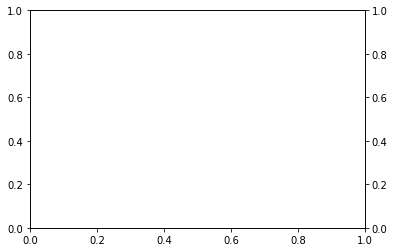

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

a = np.linspace(-5,5, 11)
# data1 = np.sort(np.random.rand(len(a),5))
# data1[:,0] =a 
# data2 = np.sort(np.random.rand(len(a),5))*10
# data2[:,0] =a 
# df = pd.DataFrame(data1, columns=["A", "B1", "C1", "D1", "E1"])
# df2 = pd.DataFrame(data2, columns=["A", "B2", "C2", "D2", "E2"])

fig, ax = plt.subplots()
ax2 = ax.twinx()

pred.plot(x= 'date', y=["pct_cli"], ax=ax)
valid.plot(x= 'date', y=["pct_ili"], ax=ax2, ls="--")

plt.show()

# import pandas as pd
# import statsmodels.api as sm
# import matplotlib.pylab as plt
# from pandas.tools.plotting import andrews_curves

# # data = sm.datasets.get_rdataset('airquality').data
# fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1)
# data = data[data.columns.tolist()[3:]] # use only Temp, Month, Day

# # Andrews' curves
# andrews_curves(data, 'Month', ax=ax1)

# # multiline plot with group by
# for key, grp in data.groupby(['Month']): 
#     ax2.plot(grp['Day'], grp['Temp'], label = "Temp in {0:02d}".format(key))
# plt.legend(loc='best')    
# plt.show()

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.vector_ar.var_model import VAR


data_time['date'] = pd.to_datetime(data_time.date)
data_ = data_time.drop(['date'], axis=1)
data_.index = data_time.date
data_ = data_[data_.region_agg == 'Tokyo']
data_ = data_.drop(columns = ['Unnamed: 0', 'region_agg'])
data_ = data_.dropna()


#creating the train and validation set
train = data_[:int(0.8*(len(data_)))]
valid = data_[int(0.8*(len(data_))):]

#fit the model


model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

cols = data_.columns
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(data_.shape[1]):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

#check rmse
pred.columns = data_.columns
for i in cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], valid[i])))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


rmse value for total_responses is :  104.7971904415424
rmse value for weight_sums is :  311898.4039726496
rmse value for pct_cli is :  0.3318239006617308
rmse value for pct_ili is :  0.3397322574662205
rmse value for pct_fever is :  0.633476879626684
rmse value for pct_cough is :  1.0213440246749057
rmse value for pct_difficulty_breathing is :  0.3615875623526048
rmse value for pct_fatigue is :  1.2999835596633573
rmse value for pct_stuffy_runny_nose is :  2.7152392191736716
rmse value for pct_aches_muscle_pain is :  1.2682539097933105
rmse value for pct_sore_throat is :  1.33978415453476
rmse value for pct_chest_pain is :  0.588511846795109
rmse value for pct_nausea is :  0.637092950109038
rmse value for pct_anosmia_ageusia is :  0.22782258692036583
rmse value for pct_eye_pain is :  0.9302183133648187
rmse value for pct_headache is :  1.365600061693889
rmse value for pct_chills is :  1.2096640774977583
rmse value for pct_cmnty_sick is :  0.835575989343898
rmse value for pct_ever_teste

In [ ]:
print(data_.pct_cli.min())
print(data_.pct_cli.max())
print(data_.shape[0])

0.13916666666666663
1.0908333333333333
126


In [ ]:
data_time[data_time['pct_cli']>data_time['pct_cough']][['pct_cli','pct_difficulty_breathing',
       'pct_fatigue', 'pct_stuffy_runny_nose', 'pct_aches_muscle_pain',
       'pct_sore_throat', 'pct_chest_pain', 'pct_nausea',
       'pct_anosmia_ageusia', 'pct_eye_pain', 'pct_headache', 'pct_chills',]]

,pct_cli,pct_difficulty_breathing,pct_fatigue,pct_stuffy_runny_nose,pct_aches_muscle_pain,pct_sore_throat,pct_chest_pain,pct_nausea,pct_anosmia_ageusia,pct_eye_pain,pct_headache,pct_chills
55,5.36,0.00,17.86,12.28,18.18,10.71,3.64,3.57,5.36,5.45,9.09,NaN
56,4.35,1.47,17.14,11.43,16.18,10.14,2.94,4.35,5.71,5.80,8.82,NaN
307,5.08,3.39,33.90,13.56,10.17,10.17,3.39,6.78,1.69,8.47,27.12,NaN
953,6.35,6.25,15.62,23.81,14.29,19.05,14.06,6.35,4.69,19.05,30.16,NaN
954,5.05,4.00,13.00,19.00,13.13,15.15,10.00,4.04,4.00,15.15,32.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
336204,2.41,2.41,7.23,7.23,10.84,3.61,2.41,2.41,1.20,3.61,9.64,1.20
337687,1.92,5.77,3.85,5.66,19.23,5.77,0.00,0.00,1.92,7.69,9.62,0.00
337688,2.74,5.48,5.56,5.48,20.83,6.94,0.00,0.00,1.39,6.94,11.11,1.39
340179,3.12,0.00,13.85,25.00,12.50,12.31,3.12,3.12,1.56,6.25,20.31,3.12


In [ ]:
data_time[data_time['pct_cli']>data_time['pct_sore_throat']][['pct_cli','pct_difficulty_breathing',
       'pct_fatigue', 'pct_stuffy_runny_nose', 'pct_aches_muscle_pain',
       'pct_sore_throat', 'pct_chest_pain', 'pct_nausea',
       'pct_anosmia_ageusia', 'pct_eye_pain', 'pct_headache', 'pct_chills',]]

,pct_cli,pct_difficulty_breathing,pct_fatigue,pct_stuffy_runny_nose,pct_aches_muscle_pain,pct_sore_throat,pct_chest_pain,pct_nausea,pct_anosmia_ageusia,pct_eye_pain,pct_headache,pct_chills
242,2.74,2.74,6.85,6.85,13.70,0.00,2.74,2.74,0.00,4.11,11.11,NaN
789,13.91,18.26,24.35,33.04,29.57,12.17,13.91,12.17,16.52,20.00,35.96,NaN
801,4.21,8.42,16.84,26.04,16.84,3.16,9.47,5.26,10.53,7.29,24.21,NaN
1551,7.04,8.45,15.49,28.17,17.14,4.23,8.45,5.63,9.86,8.45,16.90,NaN
2540,10.91,12.73,21.82,25.45,21.82,7.27,9.09,7.27,14.55,12.73,25.45,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
340110,5.71,4.29,12.86,32.39,22.86,4.29,8.57,5.71,1.43,11.43,22.86,10.00
340187,9.80,6.00,8.00,10.00,12.00,6.00,8.00,2.00,8.00,8.00,19.61,10.00
340462,4.29,2.86,25.71,11.43,18.57,2.86,7.14,2.86,0.00,5.71,10.00,11.43
340593,3.08,1.56,16.92,7.69,23.08,0.00,3.12,3.08,3.12,6.25,15.62,3.08


In [ ]:
data_time[data_time['pct_cli']>data_time['pct_anosmia_ageusia']][['pct_cli','pct_difficulty_breathing',
       'pct_fatigue', 'pct_stuffy_runny_nose', 'pct_aches_muscle_pain',
       'pct_sore_throat', 'pct_chest_pain', 'pct_nausea',
       'pct_anosmia_ageusia', 'pct_eye_pain', 'pct_headache', 'pct_chills']]

,pct_cli,pct_difficulty_breathing,pct_fatigue,pct_stuffy_runny_nose,pct_aches_muscle_pain,pct_sore_throat,pct_chest_pain,pct_nausea,pct_anosmia_ageusia,pct_eye_pain,pct_headache,pct_chills
22,2.86,1.43,20.00,14.29,12.68,10.00,7.14,5.71,1.43,14.29,33.80,NaN
50,1.11,3.33,15.38,12.09,18.68,15.56,5.56,6.59,0.00,14.29,35.56,NaN
53,1.89,3.77,7.55,14.81,15.09,9.43,1.89,1.89,0.00,3.77,20.75,NaN
70,1.61,4.84,14.29,12.90,16.13,6.35,3.17,1.61,0.00,3.23,11.29,NaN
71,0.87,5.22,15.25,17.39,10.43,4.31,3.42,0.86,0.86,1.74,12.07,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
341349,1.43,2.86,32.39,12.86,25.35,4.23,5.71,7.14,0.00,5.71,23.94,14.29
341362,4.29,8.57,35.71,15.71,17.14,9.86,8.57,11.43,1.43,10.00,36.62,7.14
341372,2.99,4.48,29.85,25.37,8.96,8.96,4.48,4.48,1.49,5.97,8.96,4.48
341373,1.36,5.44,29.93,23.13,10.88,11.56,2.72,4.08,0.68,6.12,14.29,5.44


In [ ]:
data_time[data_time['pct_cli']>data_time['pct_difficulty_breathing']][['pct_cli','pct_difficulty_breathing',
       'pct_fatigue', 'pct_stuffy_runny_nose', 'pct_aches_muscle_pain',
       'pct_sore_throat', 'pct_chest_pain', 'pct_nausea',
       'pct_anosmia_ageusia', 'pct_eye_pain', 'pct_headache', 'pct_chills']]

,pct_cli,pct_difficulty_breathing,pct_fatigue,pct_stuffy_runny_nose,pct_aches_muscle_pain,pct_sore_throat,pct_chest_pain,pct_nausea,pct_anosmia_ageusia,pct_eye_pain,pct_headache,pct_chills
22,2.86,1.43,20.00,14.29,12.68,10.00,7.14,5.71,1.43,14.29,33.80,NaN
55,5.36,0.00,17.86,12.28,18.18,10.71,3.64,3.57,5.36,5.45,9.09,NaN
56,4.35,1.47,17.14,11.43,16.18,10.14,2.94,4.35,5.71,5.80,8.82,NaN
100,1.89,0.00,0.00,15.09,13.21,5.56,1.89,1.89,3.77,1.85,11.11,NaN
101,3.23,2.42,4.84,21.77,14.52,4.80,1.61,2.42,3.23,7.20,18.40,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
341307,3.57,0.00,28.57,16.07,19.64,14.29,1.79,3.57,0.00,5.36,23.21,8.93
341309,1.68,0.84,23.73,16.81,21.85,11.02,2.54,3.39,0.00,3.36,12.71,2.54
341329,5.06,0.00,34.18,35.44,26.58,16.46,3.80,8.86,1.27,3.80,30.38,5.06
341355,2.63,1.32,25.00,15.58,19.74,17.11,9.21,5.26,6.58,10.53,28.95,9.09


In [ ]:
data_time[data_time['pct_cli']>data_time['pct_fatigue']][['pct_cli','pct_difficulty_breathing',
       'pct_fatigue', 'pct_stuffy_runny_nose', 'pct_aches_muscle_pain',
       'pct_sore_throat', 'pct_chest_pain', 'pct_nausea',
       'pct_anosmia_ageusia', 'pct_eye_pain', 'pct_headache', 'pct_chills']]

,pct_cli,pct_difficulty_breathing,pct_fatigue,pct_stuffy_runny_nose,pct_aches_muscle_pain,pct_sore_throat,pct_chest_pain,pct_nausea,pct_anosmia_ageusia,pct_eye_pain,pct_headache,pct_chills
100,1.89,0.00,0.00,15.09,13.21,5.56,1.89,1.89,3.77,1.85,11.11,NaN
3174,5.00,3.28,4.92,5.00,10.00,11.67,3.28,8.33,3.28,0.00,19.35,NaN
3340,3.17,4.76,1.56,17.19,12.50,7.94,1.56,1.59,3.17,1.56,12.50,NaN
3683,1.79,0.00,0.00,5.36,10.71,3.57,0.00,0.00,0.00,1.79,5.36,NaN
6867,0.97,0.96,0.96,15.38,6.73,2.88,0.00,0.00,0.00,0.00,1.92,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
332797,5.66,1.89,3.77,11.32,7.55,7.55,5.66,1.89,1.89,1.89,16.98,3.77
334900,4.00,2.00,2.00,6.00,4.00,13.73,2.00,4.00,6.00,0.00,12.00,2.00
340137,10.17,1.72,5.17,18.64,20.69,10.34,13.79,6.90,6.90,13.79,22.41,12.07
340138,8.75,2.53,6.25,18.75,22.78,10.13,12.66,7.59,7.59,13.92,23.08,10.13


In [ ]:
data_time[data_time['pct_cli']>data_time[ 'pct_stuffy_runny_nose']][['pct_cli','pct_difficulty_breathing',
       'pct_fatigue', 'pct_stuffy_runny_nose', 'pct_aches_muscle_pain',
       'pct_sore_throat', 'pct_chest_pain', 'pct_nausea',
       'pct_anosmia_ageusia', 'pct_eye_pain', 'pct_headache', 'pct_chills']]

,pct_cli,pct_difficulty_breathing,pct_fatigue,pct_stuffy_runny_nose,pct_aches_muscle_pain,pct_sore_throat,pct_chest_pain,pct_nausea,pct_anosmia_ageusia,pct_eye_pain,pct_headache,pct_chills
3760,2.04,0.00,14.00,2.00,9.80,12.00,10.00,0.00,2.00,6.00,20.00,NaN
3761,3.64,1.79,16.07,3.51,12.28,14.04,10.71,1.79,5.26,8.77,22.81,NaN
7005,5.77,3.85,11.76,3.85,17.31,19.23,15.38,0.00,3.85,3.85,26.92,NaN
7006,4.84,3.23,11.48,3.23,14.52,17.74,14.52,1.61,3.23,3.23,22.58,NaN
7007,5.77,3.85,11.76,3.85,17.31,19.23,15.38,0.00,3.85,3.85,26.92,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
333843,6.25,0.00,12.50,4.69,15.62,10.94,4.62,0.00,6.15,7.81,18.46,3.12
333844,6.45,0.00,11.29,4.84,12.90,9.68,4.76,0.00,6.35,6.45,19.05,3.23
338272,8.54,5.00,12.66,7.59,17.28,13.75,5.06,3.75,7.50,5.06,13.92,8.97
338884,3.39,1.69,8.33,1.69,11.67,3.39,0.00,1.69,3.39,3.39,8.33,1.67


In [ ]:
data_time[data_time['pct_cli']>data_time['pct_aches_muscle_pain']][['pct_cli','pct_difficulty_breathing',
       'pct_fatigue', 'pct_stuffy_runny_nose', 'pct_aches_muscle_pain',
       'pct_sore_throat', 'pct_chest_pain', 'pct_nausea',
       'pct_anosmia_ageusia', 'pct_eye_pain', 'pct_headache', 'pct_chills']]

,pct_cli,pct_difficulty_breathing,pct_fatigue,pct_stuffy_runny_nose,pct_aches_muscle_pain,pct_sore_throat,pct_chest_pain,pct_nausea,pct_anosmia_ageusia,pct_eye_pain,pct_headache,pct_chills
4977,3.03,0.00,3.03,7.58,0.00,7.58,1.52,0.00,0.00,0.00,4.55,NaN
7109,5.45,3.64,26.79,17.86,5.36,12.50,5.45,5.36,0.00,3.64,19.64,NaN
7128,3.77,0.00,5.66,9.43,1.89,3.77,0.00,0.00,0.00,1.89,11.32,NaN
23497,8.16,4.08,38.46,4.08,8.00,10.20,12.50,8.16,4.08,6.12,25.00,12.24
28187,2.08,6.12,30.61,16.67,2.04,14.00,14.29,6.12,2.08,22.45,31.25,6.12
...,...,...,...,...,...,...,...,...,...,...,...,...
326894,7.55,5.88,11.76,7.84,5.88,3.92,3.92,3.85,3.92,9.62,15.09,4.00
328301,3.92,1.96,31.37,15.69,1.96,5.88,0.00,1.96,3.92,0.00,17.65,0.00
331503,2.00,0.00,6.00,6.00,0.00,6.00,4.00,0.00,4.00,6.00,16.00,0.00
331848,3.30,4.40,10.99,31.87,2.20,17.58,5.49,10.99,2.20,14.29,27.47,4.40


In [ ]:
data_time[data_time['pct_cli']>data_time['pct_chest_pain']][['pct_cli','pct_difficulty_breathing',
       'pct_fatigue', 'pct_stuffy_runny_nose', 'pct_aches_muscle_pain',
       'pct_sore_throat', 'pct_chest_pain', 'pct_nausea',
       'pct_anosmia_ageusia', 'pct_eye_pain', 'pct_headache', 'pct_chills']]

,pct_cli,pct_difficulty_breathing,pct_fatigue,pct_stuffy_runny_nose,pct_aches_muscle_pain,pct_sore_throat,pct_chest_pain,pct_nausea,pct_anosmia_ageusia,pct_eye_pain,pct_headache,pct_chills
55,5.36,0.00,17.86,12.28,18.18,10.71,3.64,3.57,5.36,5.45,9.09,NaN
56,4.35,1.47,17.14,11.43,16.18,10.14,2.94,4.35,5.71,5.80,8.82,NaN
64,1.28,3.85,12.82,11.54,5.13,10.26,0.00,6.41,2.56,7.69,25.64,NaN
101,3.23,2.42,4.84,21.77,14.52,4.80,1.61,2.42,3.23,7.20,18.40,NaN
214,4.48,5.97,22.06,35.71,30.88,21.74,2.99,8.82,15.94,14.71,46.38,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
341307,3.57,0.00,28.57,16.07,19.64,14.29,1.79,3.57,0.00,5.36,23.21,8.93
341329,5.06,0.00,34.18,35.44,26.58,16.46,3.80,8.86,1.27,3.80,30.38,5.06
341367,1.41,1.41,36.11,18.31,22.22,4.17,0.00,1.41,1.41,11.27,22.54,7.04
341378,1.59,4.76,26.98,15.87,11.11,4.76,0.00,3.17,0.00,3.17,6.35,3.17


In [ ]:
data_time[data_time['pct_cli']>data_time['pct_nausea']][['pct_cli','pct_difficulty_breathing',
       'pct_fatigue', 'pct_stuffy_runny_nose', 'pct_aches_muscle_pain',
       'pct_sore_throat', 'pct_chest_pain', 'pct_nausea',
       'pct_anosmia_ageusia', 'pct_eye_pain', 'pct_headache', 'pct_chills']]

,pct_cli,pct_difficulty_breathing,pct_fatigue,pct_stuffy_runny_nose,pct_aches_muscle_pain,pct_sore_throat,pct_chest_pain,pct_nausea,pct_anosmia_ageusia,pct_eye_pain,pct_headache,pct_chills
51,2.99,7.46,7.46,19.12,7.46,17.65,4.48,1.49,4.48,5.97,27.94,NaN
55,5.36,0.00,17.86,12.28,18.18,10.71,3.64,3.57,5.36,5.45,9.09,NaN
71,0.87,5.22,15.25,17.39,10.43,4.31,3.42,0.86,0.86,1.74,12.07,NaN
101,3.23,2.42,4.84,21.77,14.52,4.80,1.61,2.42,3.23,7.20,18.40,NaN
122,1.69,3.39,25.42,18.64,13.56,1.69,5.08,0.00,1.69,3.39,10.17,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
341193,6.02,4.82,15.66,16.87,18.07,15.66,6.02,4.82,4.82,9.64,18.07,3.66
341248,3.50,1.95,9.06,8.59,12.84,6.98,5.43,2.75,3.50,8.53,11.67,2.75
341283,5.26,2.13,16.67,11.70,15.62,12.63,6.32,4.26,3.19,4.21,28.42,3.19
341305,4.00,2.00,22.00,22.00,14.00,8.00,2.00,2.00,6.00,6.00,22.00,6.00


In [ ]:
data_time[data_time['pct_cli']>data_time['pct_eye_pain']][['pct_cli','pct_difficulty_breathing',
       'pct_fatigue', 'pct_stuffy_runny_nose', 'pct_aches_muscle_pain',
       'pct_sore_throat', 'pct_chest_pain', 'pct_nausea',
       'pct_anosmia_ageusia', 'pct_eye_pain', 'pct_headache', 'pct_chills']]

,pct_cli,pct_difficulty_breathing,pct_fatigue,pct_stuffy_runny_nose,pct_aches_muscle_pain,pct_sore_throat,pct_chest_pain,pct_nausea,pct_anosmia_ageusia,pct_eye_pain,pct_headache,pct_chills
100,1.89,0.00,0.00,15.09,13.21,5.56,1.89,1.89,3.77,1.85,11.11,NaN
241,10.71,3.57,14.04,12.50,17.86,10.71,8.93,3.57,3.57,8.93,19.64,NaN
440,5.45,5.45,18.18,26.79,20.00,14.29,1.82,5.45,3.64,3.64,26.79,NaN
473,4.76,3.17,29.03,14.29,17.74,14.29,11.29,17.46,3.23,3.23,31.25,NaN
1041,5.56,7.41,33.33,14.81,16.67,9.26,5.56,11.11,5.56,1.85,18.18,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
340996,1.96,1.96,31.37,29.41,19.61,9.80,5.88,5.88,0.00,0.00,25.49,3.92
341153,7.14,5.36,36.21,17.86,20.69,10.71,8.62,8.77,1.79,5.36,24.56,22.81
341283,5.26,2.13,16.67,11.70,15.62,12.63,6.32,4.26,3.19,4.21,28.42,3.19
341329,5.06,0.00,34.18,35.44,26.58,16.46,3.80,8.86,1.27,3.80,30.38,5.06


In [ ]:
data_time[data_time['pct_cli']>data_time['pct_headache']][['pct_cli','pct_difficulty_breathing',
       'pct_fatigue', 'pct_stuffy_runny_nose', 'pct_aches_muscle_pain',
       'pct_sore_throat', 'pct_chest_pain', 'pct_nausea',
       'pct_anosmia_ageusia', 'pct_eye_pain', 'pct_headache', 'pct_chills']]

,pct_cli,pct_difficulty_breathing,pct_fatigue,pct_stuffy_runny_nose,pct_aches_muscle_pain,pct_sore_throat,pct_chest_pain,pct_nausea,pct_anosmia_ageusia,pct_eye_pain,pct_headache,pct_chills
41452,3.12,4.69,6.25,4.69,3.12,3.12,1.56,3.12,0.00,4.69,1.56,1.59
58495,3.85,1.92,25.00,17.31,11.54,1.92,5.77,3.85,0.00,1.92,1.92,3.85
68777,2.60,0.00,1.30,14.29,3.90,1.30,1.30,0.00,0.00,1.30,1.30,0.00
71707,1.56,0.00,3.12,10.94,13.28,2.34,1.56,0.00,0.00,2.34,0.78,0.00
81394,2.86,0.00,5.71,15.71,11.43,4.29,1.43,1.43,0.00,0.00,1.43,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
322638,1.56,0.00,4.69,9.38,4.69,4.69,1.56,1.56,0.00,3.12,0.00,0.00
335503,5.88,2.00,11.76,9.80,8.00,9.80,0.00,1.96,3.92,4.00,4.00,2.00
337029,3.77,1.92,7.69,9.62,9.62,7.55,3.85,0.00,3.85,5.77,1.92,1.92
337032,3.64,1.85,7.41,9.26,9.26,7.27,3.70,0.00,3.70,5.56,1.85,1.85


In [ ]:
data_time[data_time['pct_cli']>data_time['pct_chills']][['pct_cli','pct_difficulty_breathing',
       'pct_fatigue', 'pct_stuffy_runny_nose', 'pct_aches_muscle_pain',
       'pct_sore_throat', 'pct_chest_pain', 'pct_nausea',
       'pct_anosmia_ageusia', 'pct_eye_pain', 'pct_headache', 'pct_chills']]

,pct_cli,pct_difficulty_breathing,pct_fatigue,pct_stuffy_runny_nose,pct_aches_muscle_pain,pct_sore_throat,pct_chest_pain,pct_nausea,pct_anosmia_ageusia,pct_eye_pain,pct_headache,pct_chills
15567,0.56,0.56,6.35,10.660,10.800,3.645,2.105,3.225,0.56,5.33,10.935,0.000
15571,0.44,0.00,4.20,13.045,8.695,4.785,2.800,1.400,0.44,4.64,8.550,0.000
15573,0.39,0.58,4.52,15.375,10.335,3.975,2.085,1.895,0.39,3.88,6.740,0.195
15574,1.85,7.41,24.07,21.820,16.670,1.890,5.560,3.770,5.77,15.09,16.670,0.000
15575,1.96,7.84,28.85,17.310,15.690,5.880,7.840,5.880,3.92,23.53,19.610,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
341332,1.45,5.80,27.54,23.190,18.840,8.700,1.450,8.700,0.00,4.35,10.140,0.000
341356,1.23,6.17,13.58,13.580,12.350,8.640,4.940,2.470,1.23,4.94,23.460,0.000
341358,4.05,2.70,17.57,12.160,21.620,13.510,4.050,0.000,4.05,6.76,22.970,2.670
341371,0.90,0.90,29.73,16.220,16.220,6.310,2.700,3.600,0.90,0.00,18.920,0.000


In [ ]:
data_time.shape[0]

NameError: ignored

## Deep Learning (LSTM) Model

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [ ]:
def relative_error_dl(pred,valid):
  err = 0
  diff = abs(pred - valid)
  rel_err = diff/(valid + 1)
  # err+= rel_err
  # err /= pred.shape[0]
  
  # print(err*100)
  return (rel_err.mean()*100)

In [ ]:
data_time = data_time[['date', 'country_agg', 
#                        'bucket', 
                       'Unnamed: 0', 'total_responses',
       'weight_sums', 'pct_fever', 'pct_cough',
       'pct_difficulty_breathing', 'pct_fatigue', 'pct_stuffy_runny_nose',
       'pct_aches_muscle_pain', 'pct_sore_throat', 'pct_chest_pain',
       'pct_nausea', 'pct_anosmia_ageusia', 'pct_eye_pain', 'pct_headache',
       'pct_chills', 'pct_cmnty_sick', 'pct_ever_tested',
       'pct_tested_recently', 'pct_worked_outside_home',
       'pct_grocery_outside_home', 'pct_ate_outside_home',
       'pct_spent_time_with_non_hh', 'pct_attended_public_event',
       'pct_used_public_transit', 'pct_direct_contact_with_non_hh',
       'pct__all_time', 'pct_wear_mask_most_time', 'pct_wear_mask_half_time',
       'pct_wear_mask_some_time', 'pct_wear_mask_none_time', 'pct_no_public',
       'pct_fever_weighted',
       'pct_cough_weighted', 'pct_difficulty_breathing_weighted',
       'pct_fatigue_weighted', 'pct_stuffy_runny_nose_weighted',
       'pct_aches_muscle_pain_weighted', 'pct_sore_throat_weighted',
       'pct_chest_pain_weighted', 'pct_nausea_weighted',
       'pct_anosmia_ageusia_weighted', 'pct_eye_pain_weighted',
       'pct_headache_weighted', 'pct_chills_weighted',
       'pct_cmnty_sick_weighted', 'pct_ever_tested_weighted',
       'pct_tested_recently_weighted', 'pct_worked_outside_home_weighted',
       'pct_grocery_outside_home_weighted', 'pct_ate_outside_home_weighted',
       'pct_spent_time_with_non_hh_weighted',
       'pct_attended_public_event_weighted',
       'pct_used_public_transit_weighted',
       'pct_direct_contact_with_non_hh_weighted', 'pct__all_time_weighted',
       'pct_wear_mask_most_time_weighted', 'pct_wear_mask_half_time_weighted',
       'pct_wear_mask_some_time_weighted', 'pct_wear_mask_none_time_weighted',
       'pct_no_public_weighted','pct_cli']]

In [ ]:


# Please mention the region of interest here
region_of_interest = 'Mexico'
# bucket_of_interest = 'male||55+'


data_time['date'] = pd.to_datetime(data_time.date)
data_ = data_time.drop(['date'], axis=1)
data_.index = data_time.date
data_ = data_[(data_.country_agg == region_of_interest)]
# data_ = data_[(data_.bucket == bucket_of_interest)]
# data_ = data_.drop(columns = ['Unnamed: 0', 'region_agg','bucket', 'weight_sums'])
data_ = data_.drop(columns = ['Unnamed: 0', 'country_agg', 'weight_sums'])
data_ = data_.dropna()

# target = data_['pct_cli']
# data_ = data_.drop(columns = ['pct_cli'])

data_ = data_[[
 'pct_ili_weighted',
 'pct_fever_weighted',
 'pct_cough_weighted',
 'pct_difficulty_breathing_weighted',
#  'pct_fatigue_weighted',
 'pct_stuffy_runny_nose_weighted',
#  'pct_aches_muscle_pain_weighted',
 'pct_sore_throat_weighted',
 'pct_chest_pain_weighted',
 'pct_nausea_weighted',
 'pct_anosmia_ageusia_weighted',
#  'pct_eye_pain_weighted',
#  'pct_headache_weighted',
#  'pct_chills_weighted',
 'pct_cmnty_sick_weighted',
#  'pct_ever_tested_weighted',
#  'pct_tested_recently_weighted',
 'pct_worked_outside_home_weighted',
 'pct_grocery_outside_home_weighted',
 'pct_ate_outside_home_weighted',
 'pct_spent_time_with_non_hh_weighted',
 'pct_attended_public_event_weighted',
 'pct_used_public_transit_weighted',
 'pct_direct_contact_with_non_hh_weighted',
 'pct__all_time_weighted',
 'pct_wear_mask_most_time_weighted',
 'pct_wear_mask_half_time_weighted',
 'pct_wear_mask_some_time_weighted',
 'pct_wear_mask_none_time_weighted',
 'pct_no_public_weighted', 'pct_cli_weighted']]
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
values = data_.values

# integer encode direction
# encoder = LabelEncoder()
# values[:,data_.shape[1]-1] = encoder.fit_transform(values[:,data_.shape[1]-1])

# ensure all data is float
values = values.astype('float32')

# normalize features
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled = scaler.fit_transform(values)

# # frame as supervised learning
# reframed = series_to_supervised(scaled, 1, 1)
reframed = series_to_supervised(values, 1, 1)
# values = series_to_supervised(values, 1, 1)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.916158   1.687119   9.321553   3.623785  18.880198  13.368814   
2   1.032600   1.852840   8.994600   3.457240  17.757360  12.458160   
3   1.200281   2.091566   9.992851   3.508916  17.735582  13.493133   
4   0.948250   1.822167   9.759542   3.861125  18.017750  13.177958   
5   1.081066   1.670369   9.117868   4.210861  18.755491  13.699713   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  ...  var15(t)   var16(t)  \
1   4.905169   6.690480   2.963701    8.642910  ...  3.400480  17.457560   
2   4.809520   6.399960   2.866280    9.345040  ...  3.877430  16.607430   
3   5.225582   6.231124   3.067992    9.318715  ...  4.593333  17.501459   
4   5.003334   6.469625   3.372250    9.237875  ...  5.517787  18.721886   
5   5.454672   7.656558   3.630902    9.271353  ...  4.546955  18.434198   

    var17(t)   var18(t)   var19(t)  var20(t)  var21(t)  var22(t)   var23(t)  \
1  41.020119  59.046162  15.877720  4

In [ ]:
# split into train and test sets
# values = reframed.values

# n_train_hours = int(0.8*(len(data_))) 
n_train_hours = -30 

train = values[:n_train_hours, :]
test = values[n_train_hours:, :]


# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]


# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


print(data_.shape)
print(values.shape)



from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot

# design network
model = Sequential()
model.add(LSTM(5, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss= root_mean_squared_error, optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=2, batch_size=72, 
                    validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
print(test_X.shape)
print(train_X.shape)

from sklearn.metrics import mean_squared_error

yhat = model.predict(test_X)
yhat = yhat.reshape(-1)

print("RMSE is - ", sqrt(mean_squared_error(test_y, yhat)))
print('mae is : ', mean_absolute_error(test_y, yhat))
print('mean relative error is : ',relative_error_dl(yhat, test_y), 
          "for a forecast of ", len(yhat), " days.")

print(yhat)
print(test_y)

(30, 1, 23)
(96, 1, 23)
RMSE is -  0.7147078671574418
mae is :  0.628028
mean relative error is :  35.81872582435608 for a forecast of  30  days.
[0.0116513 0.0116513 0.0116513 0.0116513 0.0116513 0.0116513 0.0116513
 0.0116513 0.0116513 0.0116513 0.0116513 0.0116513 0.0116513 0.0116513
 0.0116513 0.0116513 0.0116513 0.0116513 0.0116513 0.0116513 0.0116513
 0.0116513 0.0116513 0.0116513 0.0116513 0.0116513 0.0116513 0.0116513
 0.0116513 0.0116513]
[0.34083334 0.46545455 0.4075     1.0283333  0.635      0.12916666
 0.39166668 1.0133333  1.2266667  1.29       0.40916666 0.51666665
 0.5272727  0.53333336 0.74       0.25       0.46166667 0.4675
 1.531      0.9236364  0.8        0.303      0.73454547 0.403
 0.38454545 1.         0.5863636  0.18272728 0.989      0.519     ]


In [ ]:
abs(test_y - yhat).mean()

0.6997772

In [ ]:


# test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# # invert scaling for forecast
# inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
# inv_yhat = scaler.inverse_transform(inv_yhat)
# inv_yhat = inv_yhat[:,0]
# # invert scaling for actual
# test_y = test_y.reshape((len(test_y), 1))
# inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
# inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0]
# # calculate RMSE
# rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
# print('Test RMSE: %.3f' % rmse)

0.67631596


array([[0.26673073],
       [0.26673073],
       [0.26673073],
       [0.26673073],
       [0.26673073],
       [0.26673073],
       [0.26673073],
       [0.26673073]], dtype=float32)

array([1.64, 0.  , 1.49, 0.  , 1.56, 0.  , 0.  , 0.  ], dtype=float32)

In [ ]:
data_.iloc[-8:,-1]

date
2020-06-10    1.64
2020-06-12    0.00
2020-06-13    1.49
2020-06-14    0.00
2020-06-15    1.56
2020-06-18    0.00
2020-06-20    0.00
2020-07-14    0.00
Name: pct_cli, dtype: float64

In [ ]:
# drop columns we don't want to predict
# reframed.drop(reframed.columns[[4,
#  5,
#  6,
#  7,
#  8,
#  9,
#  10,
#  11,
#  12,
#  13,
#  14,
#  15,
#  16,
#  17,
#  18,
#  19,
#  20,
#  21,
#  22,
#  23,
#  24,
#  25,
#  26,
#  27,
#  28,
#  29,
#  30,
#  31,
#  32,
#  33,
#  34,
#  35,
#  36,
#  37,
#  38,
#  39,
#  40,
#  41,
#  42,
#  43,
#  44,
#  45,
#  46,
#  47,
#  48,
#  49,
#  50,
#  51,
#  52,
#  53,
#  54,
#  55,
#  56,
#  57,
#  58,
#  59,
#  60,
#  61,
#  62,
#  63,
#  64,
#  65,
#  66,
#  67,
#  68,
#  69,
#  70,
#  71,
#  72,
#  73,
#  74,
#  75,
#  76,
#  77,
#  78,
#  79,
#  80,
#  81,
#  82,
#  83,
#  84,
#  85,
#  86,
#  87,
#  88,
#  89,
#  90,
#  91,
#  92,
#  93,
#  94,
#  95,
#  96,
#  97,
#  98,
#  99,
#  100,
#  101,
#  102,
#  103,
#  104,
#  105,
#  106,
#  107,
#  108,
#  109,
#  110,
#  111,
#  112,
#  113,
#  114,
#  115,
#  116,
#  117,
#  118,
#  119,
#  120]], axis=1, inplace=True)


In [ ]:
data_.shape

(126, 64)

In [ ]:
data_.iloc[0]

total_responses                         88.5000
weight_sums                         814329.6450
pct_cli                                  3.4550
pct_ili                                  2.0750
pct_fever                               91.0000
                                       ...     
pct_wear_mask_most_time_weighted        13.3950
pct_wear_mask_half_time_weighted         4.5975
pct_wear_mask_some_time_weighted         0.1650
pct_wear_mask_none_time_weighted         0.0000
pct_no_public_weighted                  42.0000
Name: 2020-05-07 00:00:00, Length: 64, dtype: float64

In [ ]:
encoder.fit_transform(values[:,63])

array([ 42,  84, 112, 102, 110,  95, 117, 120,  96, 111, 104, 101, 107,
       105, 108,  88,  98, 100, 122,  73,  93,  89, 123,  68,  61, 109,
        94, 121,  97,  71,  69,  72,  81, 118, 119,  77,  64, 106,  28,
        44,  80, 103,  37,  48,  76,  66,  85,  43,  82,  52,  99,  18,
       113,  49,  90,  62,  33,  87,  63,  13,  83,  59, 114,  25, 116,
        57,  58,  67,  56,  23,  54,  55,  78,  30,  51,  38,  27,  60,
        79,  47,  22,  26,  53,  16,  21,  39,  75,  91,   6,  65,   5,
        24,  32,   4,  19,  34,  10,   9,  70,  46,  15,  31,   1,  45,
        36,  40,   7,  14,   0,  29,  12,  11,  17,  92,  41,   2, 115,
         8,  20,  50,   0,   3,  35,  86,   0,  74])

In [ ]:
data_.columns

Index(['total_responses', 'weight_sums', 'pct_cli', 'pct_ili', 'pct_fever',
       'pct_cough', 'pct_difficulty_breathing', 'pct_fatigue',
       'pct_stuffy_runny_nose', 'pct_aches_muscle_pain', 'pct_sore_throat',
       'pct_chest_pain', 'pct_nausea', 'pct_anosmia_ageusia', 'pct_eye_pain',
       'pct_headache', 'pct_chills', 'pct_cmnty_sick', 'pct_ever_tested',
       'pct_tested_recently', 'pct_worked_outside_home',
       'pct_grocery_outside_home', 'pct_ate_outside_home',
       'pct_spent_time_with_non_hh', 'pct_attended_public_event',
       'pct_used_public_transit', 'pct_direct_contact_with_non_hh',
       'pct__all_time', 'pct_wear_mask_most_time', 'pct_wear_mask_half_time',
       'pct_wear_mask_some_time', 'pct_wear_mask_none_time', 'pct_no_public',
       'pct_cli_weighted', 'pct_ili_weighted', 'pct_fever_weighted',
       'pct_cough_weighted', 'pct_difficulty_breathing_weighted',
       'pct_fatigue_weighted', 'pct_stuffy_runny_nose_weighted',
       'pct_aches_muscle_pa

In [ ]:
sympt_array = data_time[[
       'pct_cli_weighted', 'pct_ili_weighted', 'pct_fever_weighted',
       'pct_cough_weighted', 'pct_difficulty_breathing_weighted',
       'pct_fatigue_weighted', 'pct_stuffy_runny_nose_weighted',
       'pct_aches_muscle_pain_weighted', 'pct_sore_throat_weighted',
       'pct_chest_pain_weighted', 'pct_nausea_weighted',
       'pct_anosmia_ageusia_weighted', 'pct_eye_pain_weighted',
       'pct_headache_weighted', 'pct_chills_weighted',
       ]].fillna(0).to_numpy()

behav_array = data_time[['pct_cmnty_sick_weighted', 'pct_ever_tested_weighted',
       'pct_tested_recently_weighted', 'pct_worked_outside_home_weighted',
       'pct_grocery_outside_home_weighted', 'pct_ate_outside_home_weighted',
       'pct_spent_time_with_non_hh_weighted',
       'pct_attended_public_event_weighted',
       'pct_used_public_transit_weighted',
       'pct_direct_contact_with_non_hh_weighted', 'pct__all_time_weighted',
       'pct_wear_mask_most_time_weighted', 'pct_wear_mask_half_time_weighted',
       'pct_wear_mask_some_time_weighted', 'pct_wear_mask_none_time_weighted',
       'pct_no_public_weighted']].fillna(0).to_numpy()